# Table of Contents
1. Importing libaries
2. Importing data
3. Elbow technique
4. K-means clustering

## 1. Importing libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import MinMaxScaler #for normalising data prior to clustering
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

## 2. Importing data

In [2]:
df = pd.read_csv(r'/Users/alberttran/House Sales Analysis/02 Data/Prepared Data/house_data_cleaned.csv', index_col = 0)

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
df.shape

(21613, 20)

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

The columns 'date' and 'Size category' contain objects and they can't be fed into the k-means algorithm.

In [7]:
# Convert the 'date' variable from object to number
df["date"] = pd.to_datetime(df["date"])

# Create the 'year' and 'month' columns to store the new numeric variables
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date. month)

# Drop the 'date' column
df.drop("date", axis=1, inplace=True)

In [8]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

## 03. The elbow technique

In [9]:
# Standardize data using 'StandardScaler' function
standardized_data = StandardScaler().fit_transform(df)
print(standardized_data)

[[-0.86671733 -0.39873715 -1.44746357 ... -0.26071541 -0.69065478
   1.09962055]
 [-0.00568792 -0.39873715  0.1756067  ... -0.18786773 -0.69065478
   1.74162654]
 [-0.98084935 -1.47395936 -1.44746357 ... -0.17237524  1.44790136
  -1.46840343]
 ...
 [-0.37586519 -1.47395936 -1.77207762 ... -0.39414129 -0.69065478
  -0.18439144]
 [-0.38158814 -0.39873715  0.50022075 ... -0.42051149  1.44790136
  -1.78940643]
 [-0.58588173 -1.47395936 -1.77207762 ... -0.41794772 -0.69065478
   1.09962055]]


In [10]:
# Convert 'standardized_data' from nparray to dataframe
df_standardized = pd.DataFrame(standardized_data, columns=df.columns)

In [11]:
# show top 5 rows
df_standardized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,...,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715,-0.690655,1.099621
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,...,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868,-0.690655,1.741627
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,...,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375,1.447901,-1.468403
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,...,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522,-0.690655,1.741627
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,...,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849,1.447901,-1.468403


In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.
score = [kmeans[i].fit(df_standardized).score(df_standardized) for i in range(len(kmeans))]# Creates a score that represents a rate of variation for the given cluster option

In [13]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2966158723299093.5,
 -1408142510842010.2,
 -783163151276306.1,
 -513551189761141.7,
 -376958946553719.4,
 -290246567069328.56,
 -231818504250486.16,
 -188347525115100.28,
 -163180435427440.62]

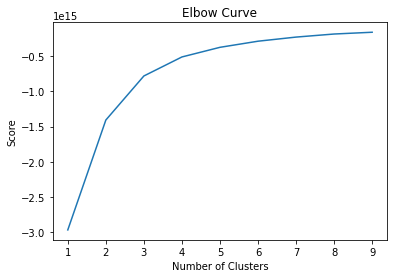

In [14]:
# Plot the elbow curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

It can be observed that the "elbow" occurs at 2 clusters.
<br>Therefore, 2 clusters will be used in the nest steps of the analysis.

## 4. K-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=2)

In [17]:
df['clusters'] = kmeans.fit_predict(df_standardized)

In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,clusters
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,0


In [19]:
df['clusters'].value_counts()

0    13878
1     7735
Name: clusters, dtype: int64

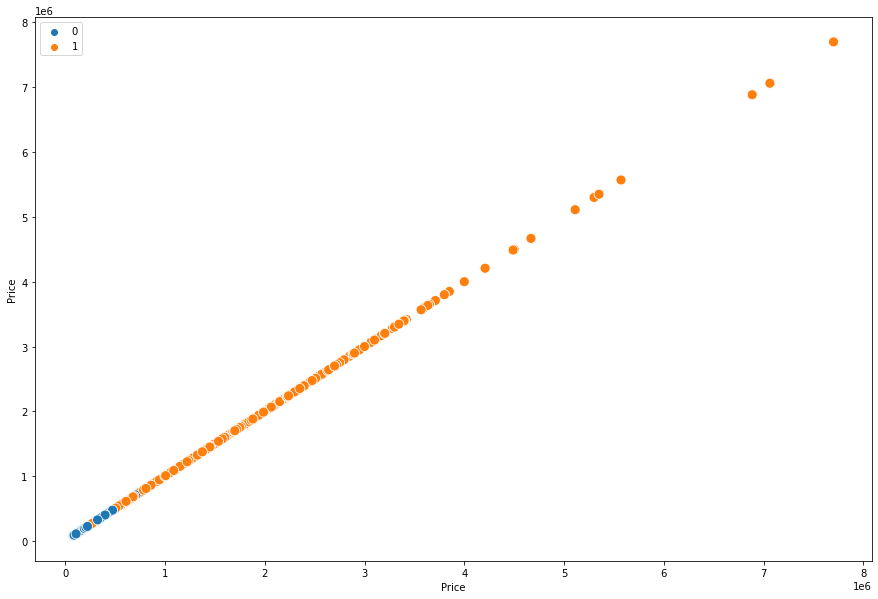

In [20]:
# Plot the clusters for the 'price'
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['price'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Price')
plt.show()

The scatterplot shows that **the first cluster** (labelled as 0, which is the most populated) **gathers properties with lower prices**, while **the second cluster** (labelled as 1) **includes properties with higher prices**.

Therefore, the following two profiles can be identified:
- **Cheap properties** (cluster 0)
- **Expensive properties** (cluster 1)

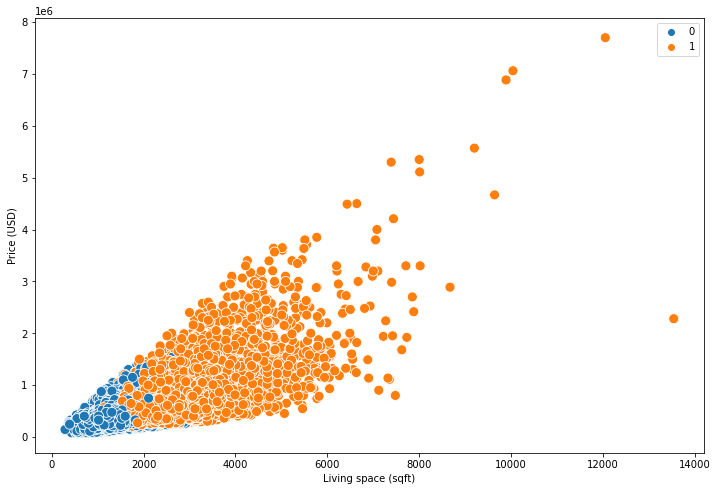

In [21]:
# Plot the clusters for the "sqft_living" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Living space (sqft)') # Label x-axis.
plt.ylabel('Price (USD)') # Label y-axis.
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller living areas
- Expensive properties (labelled as 1) have larger living areas

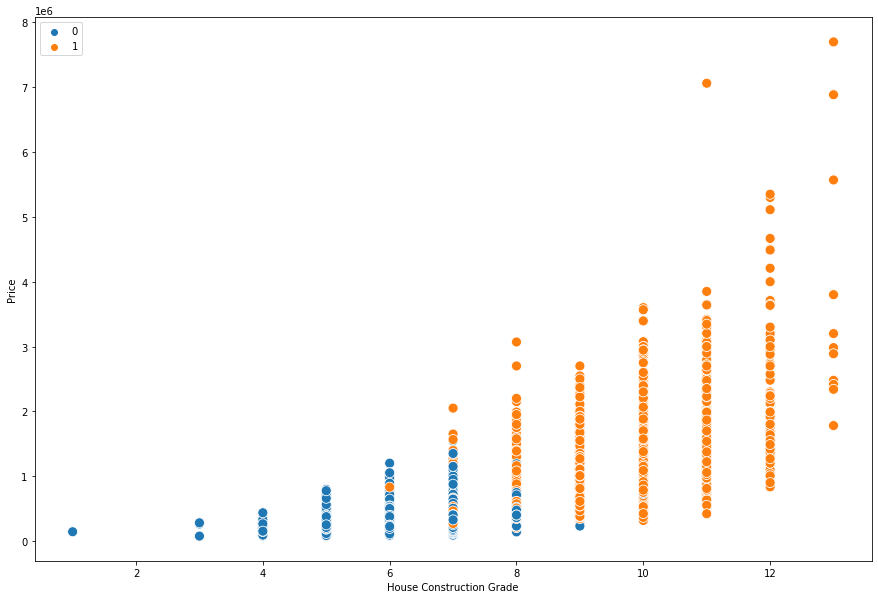

In [22]:
# Plot the clusters for the 'price' and 'grade' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['grade'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('House Construction Grade')
plt.ylabel('Price')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have lower grades
- Expensive properties (labelled as 1) have higher grades

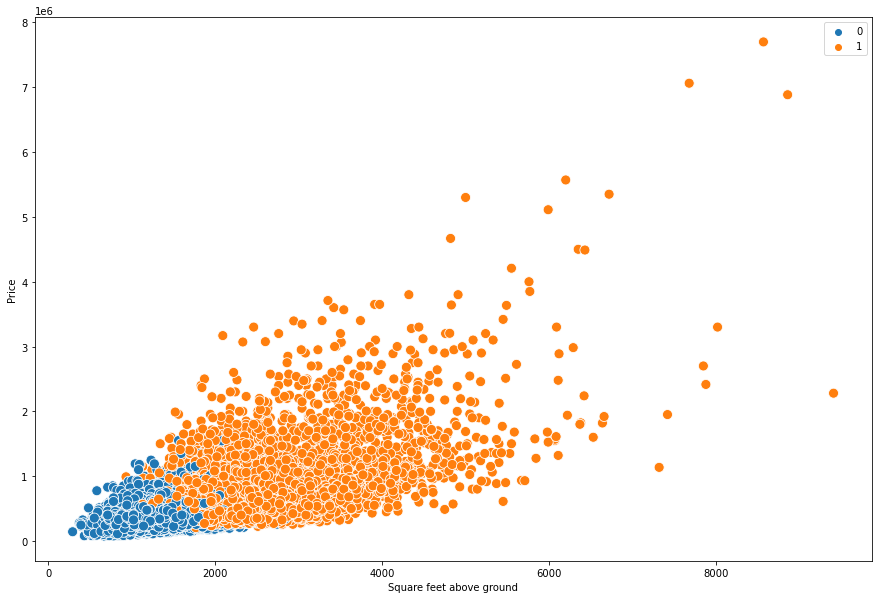

In [23]:
# Plot the clusters for the 'price' and 'sqft_above' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_above'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Square feet above ground')
plt.ylabel('Price')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller square footages above ground
- Expensive properties (labelled as 1) have larger square footages above ground

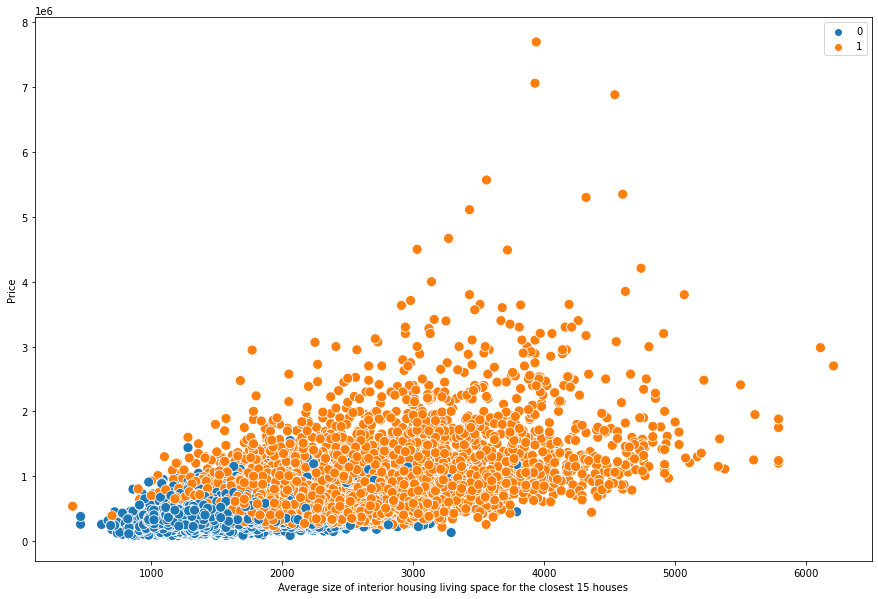

In [24]:
# Plot the clusters for the 'price' and 'sqft_living15' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_living15'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Average size of interior housing living space for the closest 15 houses')
plt.ylabel('Price')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) tend to be surrounded by properties with smaller living areas
- Expensive properties (labelled as 1) tend to be surrounded by properties with larger living areas

However, while the previous scatterplots displayed a clear distinction between the two clusters, in this case the data points appear more scattered and less structured, perhaps indicating that other factors may have a higher influence on prices.

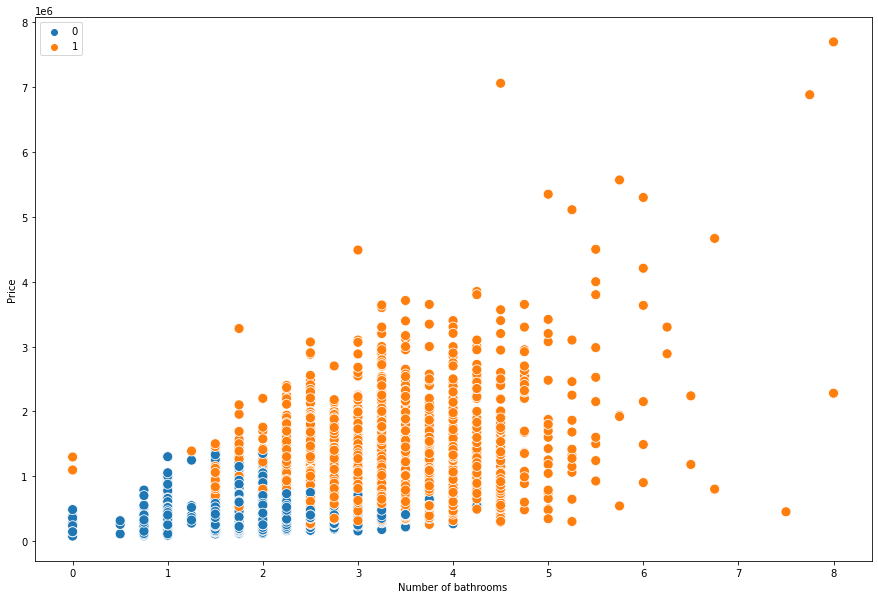

In [25]:
# Plot the clusters for the 'price' and 'bathrooms' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['bathrooms'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller numbers of bathrooms
- Expensive properties (labelled as 1) have larger numbers of bathrooms

In [ ]:
# Plot the clusters for the 'sqft_living' and 'grade' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_living'], y=df['grade'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Size of living area')
plt.ylabel('Grade')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller living areas and lower grades
- Expensive properties (labelled as 1) have larger living areas and higher grades

In [ ]:
# Plot the clusters for the 'sqft_above' and 'grade' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_above'], y=df['grade'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Square feet above ground')
plt.ylabel('Grade')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller square footages above ground and lower grades
- Expensive properties (labelled as 1) have larger square footages above ground and higher grades

In [ ]:
# Plot the clusters for the 'sqft_living' and 'sqft_living15' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_living'], y=df['sqft_living15'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Size of living area')
plt.ylabel('Average size of interior housing living space for the closest 15 houses')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller living areas and tend to be surrounded by properties with smaller living areas
- Expensive properties (labelled as 1) have larger living areas and tend to be surrounded by properties with larger living areas

In [ ]:
# Plot the clusters for the 'bathrooms' and 'grade' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['bathrooms'], y=df['grade'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of bathrooms')
plt.ylabel('Grade')
plt.show()

The following observations can be made:
Cheap properties (labelled as 0) have smaller numbers of bathrooms and lower grades
Expensive properties (labelled as 1) have larger numbers of bathrooms and higher grades

In [ ]:
# Plot the clusters for the 'price' and 'yr_built' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['yr_built'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Year of construction')
plt.ylabel('Price')
plt.show()

It can be observed that the data points are pretty evenly distributed along the x-axis, thus the year of construction doesn't seem to have a great influence on price.

### Cluster analysis
The above scatterplots clearly show that the data points can be divided into two clusters based on different features that influence home sales prices. 
<br>These features are:
- Price
- Grade
- Square footage above ground
- Average size of interior housing living space for the closest 15 houses
- Number of bathrooms

In particular, the two clusters indicate that the above features tend to be positively correlated, i.e. they all increase and decrease simultaneously. In fact, as previously discovered, a single feature on its own is not sufficient to explain home sales prices, and more aspects need to be factored in to predict the value of a property.

### Descriptive statistics

In [ ]:
# Group by 'clusters' and calculate descriptive statistics
df.groupby('clusters').agg(['mean', 'median', 'max'])

The following observations can be made:
- Expensive properties (labelled as 1) have the best stats in all categories except 'condition'.
- The condition of the property doesn't seem to have a large impact on sales prices.
- The age of the property doesn't seem to have a large impact on sales prices.

In light of all the findings, the above-mentioned profiles can now be more properly defined as:
- **Low-class properties**: falling within cluster 0
- **High-class properties**: falling within cluster 1